In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [3]:
flights_df = pd.read_csv('complete_flight_info_and weather_data.csv')

# convert flight date to date object
flights_df = flights_df.drop(['date', 'date.1','CRS_DEP_TIME','ORIGIN','DEST'], axis=1)

flights_df = flights_df.dropna()
 
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'])
del flights_df['DOT_CODE']
# Remove columns starting with 'origin' and 'dest'
columns_to_remove = [col for col in flights_df.columns if col.startswith('ORIGIN') or col.startswith('DEST')]
flights_df = flights_df.drop(columns=columns_to_remove)

# converts string TRUE/FALSE to boolean
flights_df.replace({'TRUE': True, 'FALSE': False}, inplace=True)

# convert FL_Date to year, month, day
flights_df['FL_YEAR'] = pd.to_datetime(flights_df['FL_DATE']).dt.year
flights_df['FL_MONTH'] = pd.to_datetime(flights_df['FL_DATE']).dt.month
flights_df['FL_DAY'] = pd.to_datetime(flights_df['FL_DATE']).dt.day

# drop original date time
flights_df.drop(columns=['FL_DATE'], inplace=True)


MSE: 102.86011497078758
MAE: 6.994472377110874
R2: 0.9913788740083241
MAPE: 21.03510561025231


(0.0, 200.0)

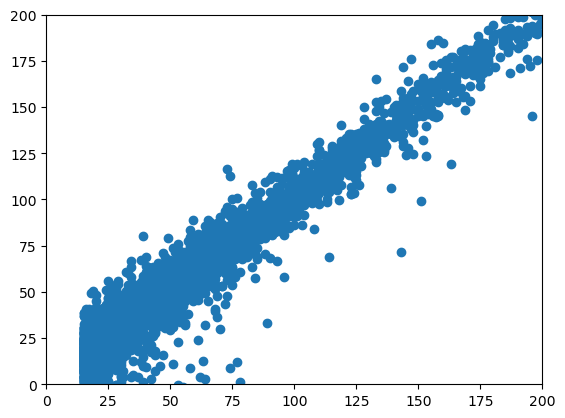

In [6]:
X = flights_df[['DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'FL_NUMBER', 'FL_YEAR', 'dest_cloud_cover', 'DEP_TIME', 'dep_temperature_2m', 'dest_wind_direction_100m', 'dest_snow_depth', 'dest_rain', 'CRS_ARR_TIME', 'dest_wind_gusts_10m', 'dest_wind_speed_100m', 'dest_wind_speed_10m', 'WHEELS_OFF', 'dest_cloud_cover_high', 'dep_apparent_temperature', 'dep_wind_direction_10m', 'dep_cloud_cover_mid', 'dest_cloud_cover_mid', 'dep_snow_depth', 'FL_DAY', 'dest_wind_direction_10m']]
y = flights_df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156, shuffle=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_predict = lm.predict(X_test)
print('MSE: ' + str(mean_squared_error(lm_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(lm_predict, y_test)))
print('R2: ' + str(r2_score(lm_predict, y_test)))
print('MAPE: ' + str(mean_absolute_percentage_error(y_test, lm_predict)))

plt.scatter(y_test, lm_predict)
plt.xlim([0, 200])
plt.ylim([0, 200])

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100